In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('classificationData.csv')
df.head()

,Ia,Ib,Ic,Va,Vb,Vc,fault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1


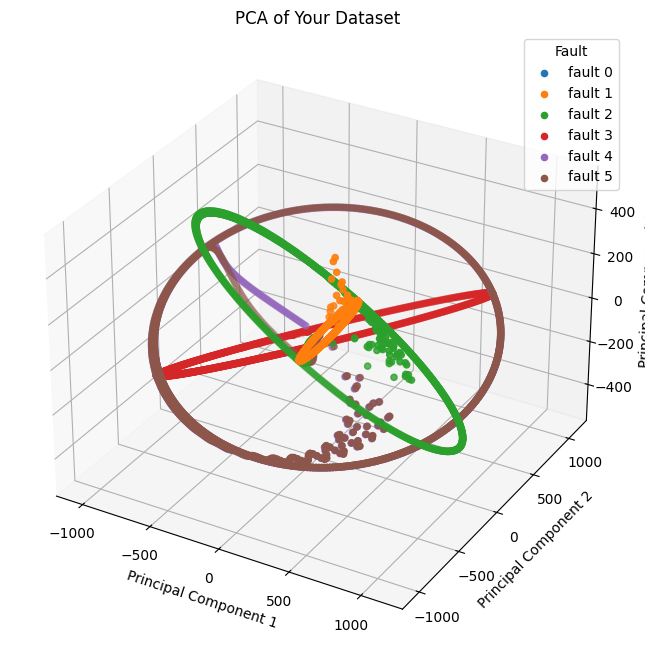

In [4]:
##PCA3 DR
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
Y = df['fault']

X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for target_value in range(6):  # Assuming 6 classes
    ax.scatter(X_pca[Y == target_value, 0], 
               X_pca[Y == target_value, 1], 
               X_pca[Y == target_value, 2],
               label='fault ' + str(target_value))
    
X_pca_df = pd.DataFrame(X_pca, columns=['pc1', 'pc2', 'pc3'])
X_pca_df['fault'] = Y.values

X_pca_df.to_csv('/Users/digvijay/Developer/MasterThesis/master-thesis-quantumkernelclassification/Code/DR_data/pca3.csv')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Your Dataset')
ax.legend(title='Fault')
plt.show()